In [1]:
import pandas as pd
import numpy as np
from models import cox_ph
import yaml
from loguru import logger


from pathlib import Path
import sys

sys.path.append('../')
from Utils.Get_adni import post_imputation_adni
from models import rubin_eval_cox, set_coef_test

In [2]:
path = "../Datasets/Imputed/Merge_BL/"

#To change whether to perform ADNIMERGE-All or ADNIMERGE-MCI
mci_only = 1


folder_path = 'adni_mci' if mci_only else 'adni_all'
dfs_train, dfs_test, config = post_imputation_adni(path, 
                                                   only_first=False, 
                                                   verbose=True,
                                                   dxs=[1] if mci_only else [0,1])


Configuration file: ..\Datasets\Imputed\Merge_BL\setup.yaml

Preparing dataset 0...

Preparing dataset 1...

Preparing dataset 2...

Preparing dataset 3...

Preparing dataset 4...

Preparing dataset 5...

Preparing dataset 6...

Preparing dataset 7...

Preparing dataset 8...

Preparing dataset 9...

Preparing dataset 10...

Preparing dataset 11...

Preparing dataset 12...

Preparing dataset 13...

Preparing dataset 14...

Preparing dataset 15...

Preparing dataset 16...

Preparing dataset 17...

Preparing dataset 18...

Preparing dataset 19...



In [3]:
print(dfs_train[0].columns)
print(dfs_train[0].shape,dfs_test[0].shape)
display(dfs_train[0]['Event'].value_counts())
display(dfs_test[0]['Event'].value_counts())

Index(['AGE', 'PTEDUCAT', 'APOE4', 'FDG', 'AV45', 'ABETA', 'TAU', 'PTAU',
       'CDRSB', 'ADAS11', 'ADAS13', 'ADASQ4', 'MMSE', 'RAVLT_immediate',
       'RAVLT_learning', 'RAVLT_forgetting', 'RAVLT_perc_forgetting',
       'LDELTOTAL', 'TRABSCOR', 'FAQ', 'MOCA', 'EcogPtMem', 'EcogPtLang',
       'EcogPtVisspat', 'EcogPtPlan', 'EcogPtOrgan', 'EcogPtDivatt',
       'EcogPtTotal', 'EcogSPMem', 'EcogSPLang', 'EcogSPVisspat', 'EcogSPPlan',
       'EcogSPOrgan', 'EcogSPDivatt', 'EcogSPTotal', 'Ventricles',
       'Hippocampus', 'Entorhinal', 'Fusiform', 'MidTemp', 'ICV', 'mPACCdigit',
       'mPACCtrailsB', 'M', 'Event', 'PTMARRY_Never_married',
       'PTMARRY_married', 'PTGENDER_Male', 'PTETHCAT_Not Hisp/Latino',
       'PTETHCAT_Unknown', 'PTRACCAT_Other', 'PTRACCAT_White'],
      dtype='object')
(764, 52) (202, 52)


Event
False    479
True     285
Name: count, dtype: int64

Event
False    129
True      73
Name: count, dtype: int64

# Cox PH vanilla model

In [4]:
cphs = []
variables = []
for i, (df_train, df_test) in enumerate(zip(dfs_train, dfs_test)):
    #Final cleanup post imputation
    
    print(f"Dataset {i}")
    print(f"Train shape: {df_train.shape}, Test shape: {df_test.shape}")
    cph, c_index, penalizer = cox_ph(df_train, df_test, cross_validate=False, verbose=False)
    print(f"Score: {c_index}, Penalizer: {penalizer}")
    
    variables.append((c_index, penalizer))
    cphs.append(cph)
scores = [x[0] for x in variables]
print(f"Final score mean: {np.mean(scores)}\t std: {np.std(scores)}")
print(f"{np.mean(scores):.3f} $\pm$ {np.std(scores):.3f}")


Dataset 0
Train shape: (764, 52), Test shape: (202, 52)
Score: 0.8519830837810035, Penalizer: 0
Dataset 1
Train shape: (764, 52), Test shape: (202, 52)
Score: 0.8371242427706024, Penalizer: 0
Dataset 2
Train shape: (764, 52), Test shape: (202, 52)
Score: 0.848668419247914, Penalizer: 0
Dataset 3
Train shape: (764, 52), Test shape: (202, 52)
Score: 0.8323236941364728, Penalizer: 0
Dataset 4
Train shape: (764, 52), Test shape: (202, 52)
Score: 0.8429534803977597, Penalizer: 0
Dataset 5
Train shape: (764, 52), Test shape: (202, 52)
Score: 0.840667504857698, Penalizer: 0
Dataset 6
Train shape: (764, 52), Test shape: (202, 52)
Score: 0.8383815293176363, Penalizer: 0
Dataset 7
Train shape: (764, 52), Test shape: (202, 52)
Score: 0.8295805234883987, Penalizer: 0
Dataset 8
Train shape: (764, 52), Test shape: (202, 52)
Score: 0.8490113155789233, Penalizer: 0
Dataset 9
Train shape: (764, 52), Test shape: (202, 52)
Score: 0.832666590467482, Penalizer: 0
Dataset 10
Train shape: (764, 52), Test sha

In [5]:
results = rubin_eval_cox(cphs)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

pd.options.display.float_format = '{:.3}'.format
display(results)

c:\Users\dbior\OneDrive - Aarhus Universitet\Dokumenter\1. Uni\10. Semester\Master-project\Code\Cluster\Survival_analysis\models.py:157: RuntimeWarning: overflow encountered in exp
  exp_ci_upper = np.exp(ci_upper)


,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,z,p,-log2(p)
covariate,,,,,,,,,,
AGE,0.00643,1.01,0.0118,-0.0167,0.0296,0.983,1.03,0.544,0.586,0.771
PTEDUCAT,0.0583,1.06,0.0246,0.01,0.107,1.01,1.11,2.37,0.0179,5.8
APOE4,0.306,1.36,0.114,0.0822,0.531,1.09,1.7,2.68,0.0074,7.08
FDG,-1.47,0.23,0.8,-3.04,0.0982,0.048,1.1,-1.84,0.0662,3.92
AV45,1.54,4.68,0.652,0.264,2.82,1.3,16.8,2.37,0.018,5.79
ABETA,-0.00027,1.0,0.000424,-0.0011,0.00056,0.999,1.0,-0.638,0.523,0.934
TAU,0.000923,1.0,0.00354,-0.00601,0.00786,0.994,1.01,0.261,0.794,0.332
PTAU,-0.00226,0.998,0.0313,-0.0637,0.0591,0.938,1.06,-0.0723,0.942,0.0856
CDRSB,0.24,1.27,0.0891,0.0656,0.415,1.07,1.51,2.7,0.00703,7.15


In [6]:
coef = results['coef']
baseline_hazards = [indv_model.baseline_hazard_ for indv_model in cphs]
scores_c, scores_ipcw, scores_ibs = set_coef_test(coef, dfs_train, dfs_test, baseline_hazards)

print(f"Final C-index score mean: {np.mean(scores_c):.3f} $\pm$ {np.std(scores_c):.3f}")
print(f"Final IPCW C-index score mean: {np.mean(scores_ipcw):.3f} $\pm$ {np.std(scores_ipcw):.3f}")
print(f"Final IPCW C-index score mean: {np.mean(scores_ibs):.3f} $\pm$ {np.std(scores_ibs):.3f}")

Final C-index score mean: 0.841 $\pm$ 0.005
Final IPCW C-index score mean: 0.843 $\pm$ 0.007
Final IPCW C-index score mean: 0.149 $\pm$ 0.004


# Cox PH with penalty (Ridge)

In [7]:
cphs_ridge = []
variables_ridge = []
for i, (df_train, df_test) in enumerate(zip(dfs_train, dfs_test)):
    #Final cleanup post imputation
    print(f"Dataset {i}")
    print(f"Train shape: {df_train.shape}, Test shape: {df_test.shape}")
    cph, c_index, penalizer = cox_ph(df_train, df_test, cross_validate=True, 
                                     verbose=False, l1_ratio=0.0,
                                     pen_val=[0.01, 0.05, 0.1, 0.2, 0.3])
    print(f"Score: {c_index}, Penalizer: {penalizer}")
    
    variables_ridge.append((c_index, penalizer))
    cphs_ridge.append(cph)

scores_ridge = [x[0] for x in variables_ridge]
print(f"Final score mean: {np.mean(scores_ridge)}\t std: {np.std(scores_ridge)}")
print(f"{np.mean(scores_ridge):.3f} $\pm$ {np.std(scores_ridge):.3f}")


Dataset 0
Train shape: (764, 52), Test shape: (202, 52)
Score: 0.8619270773802721, Penalizer: 0.3
Dataset 1
Train shape: (764, 52), Test shape: (202, 52)
Score: 0.8542690593210652, Penalizer: 0.2
Dataset 2
Train shape: (764, 52), Test shape: (202, 52)
Score: 0.8616984798262659, Penalizer: 0.2
Dataset 3
Train shape: (764, 52), Test shape: (202, 52)
Score: 0.8613555834952566, Penalizer: 0.1
Dataset 4
Train shape: (764, 52), Test shape: (202, 52)
Score: 0.851297291118985, Penalizer: 0.3
Dataset 5
Train shape: (764, 52), Test shape: (202, 52)
Score: 0.859298205509201, Penalizer: 0.3
Dataset 6
Train shape: (764, 52), Test shape: (202, 52)
Score: 0.8567836324151331, Penalizer: 0.3
Dataset 7
Train shape: (764, 52), Test shape: (202, 52)
Score: 0.8515258886729912, Penalizer: 0.2
Dataset 8
Train shape: (764, 52), Test shape: (202, 52)
Score: 0.8653560406903646, Penalizer: 0.2
Dataset 9
Train shape: (764, 52), Test shape: (202, 52)
Score: 0.8544976568750714, Penalizer: 0.1
Dataset 10
Train shape

In [8]:
results_ridge = rubin_eval_cox(cphs_ridge)
display(results_ridge.sort_values(by='coef'))

,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,z,p,-log2(p)
covariate,,,,,,,,,,
Entorhinal,-1.06,0.348,0.561,-2.16,0.0434,0.116,1.04,-1.88,0.0597,4.07
FDG,-1.05,0.35,0.504,-2.04,-0.0608,0.13,0.941,-2.08,0.0375,4.74
MidTemp,-0.86,0.423,0.413,-1.67,-0.0503,0.188,0.951,-2.08,0.0374,4.74
PTETHCAT_Unknown,-0.64,0.527,1.07,-2.74,1.46,0.0645,4.31,-0.597,0.551,0.861
Fusiform,-0.317,0.728,0.442,-1.18,0.548,0.306,1.73,-0.718,0.472,1.08
Hippocampus,-0.177,0.838,0.489,-1.14,0.781,0.321,2.18,-0.362,0.717,0.479
PTRACCAT_Other,-0.162,0.85,0.335,-0.819,0.494,0.441,1.64,-0.485,0.628,0.671
PTGENDER_Male,-0.131,0.877,0.116,-0.358,0.095,0.699,1.1,-1.14,0.255,1.97
EcogPtLang,-0.0852,0.918,0.117,-0.314,0.144,0.73,1.15,-0.729,0.466,1.1


In [9]:
coef_ridge = results_ridge['coef']
baseline_hazards_ridge = [indv_model.baseline_hazard_ for indv_model in cphs_ridge]
scores_c_ridge, scores_ipcw_ridge, scores_ibs_ridge = set_coef_test(coef_ridge, dfs_train, dfs_test, baseline_hazards_ridge)

print(f"Final C-index score mean: {np.mean(scores_c_ridge):.3f} $\pm$ {np.std(scores_c_ridge):.3f}")
print(f"Final IPCW C-index score mean: {np.mean(scores_ipcw_ridge):.3f} $\pm$ {np.std(scores_ipcw_ridge):.3f}")
print(f"Final IPCW C-index score mean: {np.mean(scores_ibs_ridge):.3f} $\pm$ {np.std(scores_ibs_ridge):.3f}")

Final C-index score mean: 0.859 $\pm$ 0.005
Final IPCW C-index score mean: 0.843 $\pm$ 0.006
Final IPCW C-index score mean: 0.151 $\pm$ 0.003


# Cox PH with penalty (Lasso)

In [11]:
cphs_lasso = []
variables_lasso = []
for i, (df_train, df_test) in enumerate(zip(dfs_train, dfs_test)):
    #Final cleanup post imputation
    print(f"Dataset {i}")
    print(f"Train shape: {df_train.shape}, Test shape: {df_test.shape}")
    cph, c_index, penalizer = cox_ph(df_train, df_test, cross_validate=True, verbose=False, l1_ratio=1.0)
    print(f"Score: {c_index}, Penalizer: {penalizer}")
    
    variables_lasso.append((c_index, penalizer))
    cphs_lasso.append(cph)
scores_lasso = [x[0] for x in variables_lasso]
print(f"Final score mean: {np.mean(scores_lasso)}\t std: {np.std(scores_lasso)}")
print(f"{np.mean(scores_lasso):.3f} $\pm$ {np.std(scores_lasso):.3f}")


Dataset 0
Train shape: (764, 52), Test shape: (202, 52)
Score: 0.8653560406903646, Penalizer: 0.01
Dataset 1
Train shape: (764, 52), Test shape: (202, 52)
Score: 0.8453537547148245, Penalizer: 0.05
Dataset 2
Train shape: (764, 52), Test shape: (202, 52)
Score: 0.864555949251343, Penalizer: 0.01
Dataset 3
Train shape: (764, 52), Test shape: (202, 52)
Score: 0.8462681449308492, Penalizer: 0.05
Dataset 4
Train shape: (764, 52), Test shape: (202, 52)
Score: 0.8544976568750714, Penalizer: 0.01
Dataset 5
Train shape: (764, 52), Test shape: (202, 52)
Score: 0.8584981140701794, Penalizer: 0.01
Dataset 6
Train shape: (764, 52), Test shape: (202, 52)
Score: 0.8510686935649788, Penalizer: 0.05
Dataset 7
Train shape: (764, 52), Test shape: (202, 52)
Score: 0.8517544862269973, Penalizer: 0.01
Dataset 8
Train shape: (764, 52), Test shape: (202, 52)
Score: 0.8675277174534233, Penalizer: 0.01
Dataset 9
Train shape: (764, 52), Test shape: (202, 52)
Score: 0.8476397302548863, Penalizer: 0.01
Dataset 10


In [12]:
results_lasso = rubin_eval_cox(cphs_lasso)
display(results_lasso.sort_values(by='coef'))

,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,z,p,-log2(p)
covariate,,,,,,,,,,
FDG,-1.29,0.274,0.711,-2.69,0.0993,0.068,1.1,-1.82,0.0687,3.86
Entorhinal,-1.19,0.305,0.845,-2.84,0.47,0.0583,1.6,-1.4,0.16,2.64
MidTemp,-0.865,0.421,0.534,-1.91,0.182,0.148,1.2,-1.62,0.105,3.25
PTETHCAT_Unknown,-0.27,0.764,1.05,-2.33,1.79,0.0971,6.0,-0.256,0.798,0.326
PTGENDER_Male,-0.0753,0.927,0.128,-0.327,0.176,0.721,1.19,-0.587,0.557,0.844
MOCA,-0.0611,0.941,0.047,-0.153,0.0311,0.858,1.03,-1.3,0.194,2.37
EcogPtLang,-0.0504,0.951,0.135,-0.315,0.214,0.73,1.24,-0.373,0.709,0.496
Fusiform,-0.0439,0.957,0.302,-0.636,0.548,0.53,1.73,-0.146,0.884,0.177
LDELTOTAL,-0.0345,0.966,0.0288,-0.0909,0.0219,0.913,1.02,-1.2,0.23,2.12


In [13]:
coef_lasso = results_lasso['coef']
baseline_hazards_lasso = [indv_model.baseline_hazard_ for indv_model in cphs_lasso]
scores_c_lasso, scores_ipcw_lasso, scores_ibs_lasso = set_coef_test(coef_lasso, dfs_train, dfs_test, baseline_hazards_lasso)

print(f"Final C-index score mean: {np.mean(scores_c_lasso):.3f} $\pm$ {np.std(scores_c_lasso):.3f}")
print(f"Final IPCW C-index score mean: {np.mean(scores_ipcw_lasso):.3f} $\pm$ {np.std(scores_ipcw_lasso):.3f}")
print(f"Final IPCW C-index score mean: {np.mean(scores_ibs_lasso):.3f} $\pm$ {np.std(scores_ibs_lasso):.3f}")

Final C-index score mean: 0.857 $\pm$ 0.006
Final IPCW C-index score mean: 0.848 $\pm$ 0.010
Final IPCW C-index score mean: 0.118 $\pm$ 0.003


# Cox PH with penalty (Elastic net)

In [14]:
cphs_elastic = []
variables_elastic = []
for i, (df_train, df_test) in enumerate(zip(dfs_train, dfs_test)):
    #Final cleanup post imputation
    print(f"Dataset {i}")
    print(f"Train shape: {df_train.shape}, Test shape: {df_test.shape}")
    cph, c_index, penalizer = cox_ph(df_train, df_test, cross_validate=True, verbose=False, l1_ratio=0.5)
    print(f"Score: {c_index}, Penalizer: {penalizer}")
    
    variables_elastic.append((c_index, penalizer))
    cphs_elastic.append(cph)
scores_elastic = [x[0] for x in variables_elastic]
print(f"Final score mean: {np.mean(scores_elastic)}\t std: {np.std(scores_elastic)}")
print(f"{np.mean(scores_elastic):.3f} $\pm$ {np.std(scores_elastic):.3f}")


Dataset 0
Train shape: (764, 52), Test shape: (202, 52)
Score: 0.8541547605440621, Penalizer: 0.1
Dataset 1
Train shape: (764, 52), Test shape: (202, 52)
Score: 0.8536975654360498, Penalizer: 0.05
Dataset 2
Train shape: (764, 52), Test shape: (202, 52)
Score: 0.8669562235684078, Penalizer: 0.01
Dataset 3
Train shape: (764, 52), Test shape: (202, 52)


c:\Users\dbior\miniforge3\Lib\site-packages\lifelines\fitters\coxph_fitter.py:1530: LinAlgWarning: Ill-conditioned matrix (rcond=9.44505e-17): result may not be accurate.
  inv_h_dot_g_T = spsolve(-h, g, assume_a="pos", check_finite=False)
c:\Users\dbior\miniforge3\Lib\site-packages\lifelines\fitters\coxph_fitter.py:1530: LinAlgWarning: Ill-conditioned matrix (rcond=7.25962e-17): result may not be accurate.
  inv_h_dot_g_T = spsolve(-h, g, assume_a="pos", check_finite=False)
c:\Users\dbior\miniforge3\Lib\site-packages\lifelines\fitters\coxph_fitter.py:1530: LinAlgWarning: Ill-conditioned matrix (rcond=6.30923e-17): result may not be accurate.
  inv_h_dot_g_T = spsolve(-h, g, assume_a="pos", check_finite=False)
c:\Users\dbior\miniforge3\Lib\site-packages\lifelines\fitters\coxph_fitter.py:1530: LinAlgWarning: Ill-conditioned matrix (rcond=4.9281e-17): result may not be accurate.
  inv_h_dot_g_T = spsolve(-h, g, assume_a="pos", check_finite=False)
c:\Users\dbior\miniforge3\Lib\site-packag

Score: 0.8550691507600868, Penalizer: 0.05
Dataset 4
Train shape: (764, 52), Test shape: (202, 52)
Score: 0.8484398216939079, Penalizer: 0.1
Dataset 5
Train shape: (764, 52), Test shape: (202, 52)
Score: 0.8502686021259572, Penalizer: 0.1
Dataset 6
Train shape: (764, 52), Test shape: (202, 52)
Score: 0.8599839981712196, Penalizer: 0.01
Dataset 7
Train shape: (764, 52), Test shape: (202, 52)
Score: 0.8491256143559264, Penalizer: 0.05
Dataset 8
Train shape: (764, 52), Test shape: (202, 52)
Score: 0.8614698822722597, Penalizer: 0.05
Dataset 9
Train shape: (764, 52), Test shape: (202, 52)
Score: 0.841924791404732, Penalizer: 0.05
Dataset 10
Train shape: (764, 52), Test shape: (202, 52)
Score: 0.8500400045719511, Penalizer: 0.05
Dataset 11
Train shape: (764, 52), Test shape: (202, 52)
Score: 0.8568979311921362, Penalizer: 0.05
Dataset 12
Train shape: (764, 52), Test shape: (202, 52)


c:\Users\dbior\miniforge3\Lib\site-packages\lifelines\fitters\coxph_fitter.py:1530: LinAlgWarning: Ill-conditioned matrix (rcond=9.61801e-17): result may not be accurate.
  inv_h_dot_g_T = spsolve(-h, g, assume_a="pos", check_finite=False)
c:\Users\dbior\miniforge3\Lib\site-packages\lifelines\fitters\coxph_fitter.py:1530: LinAlgWarning: Ill-conditioned matrix (rcond=7.42075e-17): result may not be accurate.
  inv_h_dot_g_T = spsolve(-h, g, assume_a="pos", check_finite=False)
c:\Users\dbior\miniforge3\Lib\site-packages\lifelines\fitters\coxph_fitter.py:1530: LinAlgWarning: Ill-conditioned matrix (rcond=7.69476e-17): result may not be accurate.
  inv_h_dot_g_T = spsolve(-h, g, assume_a="pos", check_finite=False)
c:\Users\dbior\miniforge3\Lib\site-packages\lifelines\fitters\coxph_fitter.py:1530: LinAlgWarning: Ill-conditioned matrix (rcond=5.92406e-17): result may not be accurate.
  inv_h_dot_g_T = spsolve(-h, g, assume_a="pos", check_finite=False)
c:\Users\dbior\miniforge3\Lib\site-packa

Score: 0.8589553091781917, Penalizer: 0.1
Dataset 13
Train shape: (764, 52), Test shape: (202, 52)
Score: 0.8584981140701794, Penalizer: 0.01
Dataset 14
Train shape: (764, 52), Test shape: (202, 52)
Score: 0.8538118642130529, Penalizer: 0.1
Dataset 15
Train shape: (764, 52), Test shape: (202, 52)
Score: 0.8494685106869356, Penalizer: 0.05
Dataset 16
Train shape: (764, 52), Test shape: (202, 52)
Score: 0.8597554006172134, Penalizer: 0.01
Dataset 17
Train shape: (764, 52), Test shape: (202, 52)
Score: 0.8410104011887073, Penalizer: 0.1
Dataset 18
Train shape: (764, 52), Test shape: (202, 52)
Score: 0.839295919533661, Penalizer: 0.05
Dataset 19
Train shape: (764, 52), Test shape: (202, 52)
Score: 0.8652417419133616, Penalizer: 0.01
Final score mean: 0.8537032803749002	 std: 0.007440619938249783
0.854 $\pm$ 0.007


In [15]:
results_elastic = rubin_eval_cox(cphs_elastic)

display(results_elastic.sort_values(by='coef'))
# display(results_elastic)

,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,z,p,-log2(p)
covariate,,,,,,,,,,
FDG,-1.23,0.294,0.648,-2.5,0.0437,0.0825,1.04,-1.89,0.0584,4.1
Entorhinal,-1.14,0.319,0.766,-2.64,0.358,0.0711,1.43,-1.49,0.136,2.88
MidTemp,-0.865,0.421,0.509,-1.86,0.133,0.155,1.14,-1.7,0.0894,3.48
PTETHCAT_Unknown,-0.292,0.747,1.06,-2.38,1.79,0.0928,6.01,-0.275,0.784,0.352
EcogPtLang,-0.0691,0.933,0.139,-0.341,0.203,0.711,1.23,-0.497,0.619,0.691
PTGENDER_Male,-0.0587,0.943,0.137,-0.328,0.211,0.72,1.23,-0.427,0.669,0.579
MOCA,-0.0554,0.946,0.0392,-0.132,0.0215,0.876,1.02,-1.41,0.158,2.66
Ventricles,-0.0442,0.957,0.278,-0.589,0.5,0.555,1.65,-0.159,0.873,0.195
Fusiform,-0.0433,0.958,0.408,-0.842,0.755,0.431,2.13,-0.106,0.915,0.128


In [16]:
coef_elastic = results_elastic['coef']
baseline_hazards_elastic = [indv_model.baseline_hazard_ for indv_model in cphs_elastic]
scores_c_elastic, scores_ipcw_elastic, scores_ibs_elastic = set_coef_test(coef_elastic, dfs_train, dfs_test, baseline_hazards_elastic)

print(f"Final C-index score mean: {np.mean(scores_c_elastic):.3f} $\pm$ {np.std(scores_c_elastic):.3f}")
print(f"Final IPCW C-index score mean: {np.mean(scores_ipcw_elastic):.3f} $\pm$ {np.std(scores_ipcw_elastic):.3f}")
print(f"Final IPCW C-index score mean: {np.mean(scores_ibs_elastic):.3f} $\pm$ {np.std(scores_ibs_elastic):.3f}")

Final C-index score mean: 0.857 $\pm$ 0.006
Final IPCW C-index score mean: 0.846 $\pm$ 0.009
Final IPCW C-index score mean: 0.116 $\pm$ 0.003


# RSF

In [17]:
from models import survival_forest

path_config = Path('./Hyperparameters/ADNI_MCI.yaml') if mci_only else Path('./Hyperparameters/ADNI_All.yaml')
# path_config = 

if not path_config.exists():
    print('Configuration file not found')
with open(path_config) as f:
        config_hyperparameters = yaml.safe_load(f)
logger.info(f"Hyperparameters: {config_hyperparameters}")

rsfs = []
for i, (df_train, df_test) in enumerate(zip(dfs_train, dfs_test)):


    rsf, score, score_ipcw, score_bri = survival_forest(df_train, df_test, config_hyperparameters, cross_validate=False, verbose=False)
    print(score, score_ipcw[0], score_bri)
    

    rsfs.append((rsf, score, score_ipcw[0], score_bri))

2024-06-03 02:39:10.229 | INFO     | __main__:<module>:10 - Hyperparameters: {'Best Parameters': {'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 600}, 'Best Score': 0.8586955077856995}


0.8485541204709109 0.8384207715048474 0.12530211399047875
0.8360955537775746 0.8498359123971566 0.12900269361734537
0.8412389987427135 0.8307674322307752 0.13278945085318097
0.8426105840667505 0.8226768372135637 0.1337700863524993
0.8415818950737227 0.8326720443174332 0.1295081073664782
0.8431820779517659 0.8280712574879256 0.1280561972999775
0.8434106755057721 0.841622782396527 0.12616755983092431
0.8389530232026517 0.8370081625310267 0.13020169316132288
0.8523259801120128 0.8380646647334818 0.12373696723582622
0.8263801577323122 0.8083111957088243 0.14911768645635348
0.8477540290318893 0.8373134760171579 0.12400922355462836
0.8501543033489541 0.8411436161507034 0.1267880406366831
0.8538118642130529 0.84091543366726 0.12502461517063077
0.8391816207566579 0.8229429632491052 0.12925646380410646
0.8396388158646703 0.8418170280144421 0.13182030404085354
0.829923419819408 0.825780221773399 0.135302645333182
0.8438678706137844 0.8303047190028389 0.1317793597253224
0.8344953708995314 0.82104

In [18]:
scores_c_rsf = [x[1] for x in rsfs]
scores_ipcw_rsf = [x[2] for x in rsfs]
scores_ibs_rsf = [x[3] for x in rsfs]
print(f"Final score mean: {np.mean(scores_c_rsf):.3f} $\pm$ {np.std(scores_c_rsf):.3f}")
print(f"Final score mean: {np.mean(scores_ipcw_rsf):.3f} $\pm$ {np.std(scores_ipcw_rsf):.3f}")
print(f"Final score mean: {np.mean(scores_ibs_rsf):.3f} $\pm$ {np.std(scores_ibs_rsf):.3f}")


Final score mean: 0.841 $\pm$ 0.007
Final score mean: 0.832 $\pm$ 0.010
Final score mean: 0.131 $\pm$ 0.006


# All scores

In [19]:
print("C-index:")
print(f"CPH: \t{np.mean(scores_c):.3f} $\pm$ {np.std(scores_c):.3f}")
print(f"Ridge: \t{np.mean(scores_c_ridge):.3f} $\pm$ {np.std(scores_c_ridge):.3f}")
print(f"Lasso: \t{np.mean(scores_c_lasso):.3f} $\pm$ {np.std(scores_c_lasso):.3f}")
print(f"Elast: \t{np.mean(scores_c_elastic):.3f} $\pm$ {np.std(scores_c_elastic):.3f}")
print(f"RSF: \t{np.mean(scores_c_rsf):.3f} $\pm$ {np.std(scores_c_rsf):.3f}")

print()
print("IPCW C:")
print(f"CPH: \t{np.mean(scores_ipcw):.3f} $\pm$ {np.std(scores_ipcw):.3f}")
print(f"Ridge: \t{np.mean(scores_ipcw_ridge):.3f} $\pm$ {np.std(scores_ipcw_ridge):.3f}")
print(f"Lasso: \t{np.mean(scores_ipcw_lasso):.3f} $\pm$ {np.std(scores_ipcw_lasso):.3f}")
print(f"Elast: \t{np.mean(scores_ipcw_elastic):.3f} $\pm$ {np.std(scores_ipcw_elastic):.3f}")
print(f"RSF: \t{np.mean(scores_ipcw_rsf):.3f} $\pm$ {np.std(scores_ipcw_rsf):.3f}")

print()
print("IBS:")
print(f"CPH: \t{np.mean(scores_ibs):.3f} $\pm$ {np.std(scores_ibs):.3f}")
print(f"Ridge: \t{np.mean(scores_ibs_ridge):.3f} $\pm$ {np.std(scores_ibs_ridge):.3f}")
print(f"Lasso: \t{np.mean(scores_ibs_lasso):.3f} $\pm$ {np.std(scores_ibs_lasso):.3f}")
print(f"Elast:\t{np.mean(scores_ibs_elastic):.3f} $\pm$ {np.std(scores_ibs_elastic):.3f}")
print(f"RSF: \t{np.mean(scores_ibs):.3f} $\pm$ {np.std(scores_ibs):.3f}")


C-index:
CPH: 	0.841 $\pm$ 0.005
Ridge: 	0.859 $\pm$ 0.005
Lasso: 	0.857 $\pm$ 0.006
Elast: 	0.857 $\pm$ 0.006
RSF: 	0.841 $\pm$ 0.007

IPCW C:
CPH: 	0.843 $\pm$ 0.007
Ridge: 	0.843 $\pm$ 0.006
Lasso: 	0.848 $\pm$ 0.010
Elast: 	0.846 $\pm$ 0.009
RSF: 	0.832 $\pm$ 0.010

IBS:
CPH: 	0.149 $\pm$ 0.004
Ridge: 	0.151 $\pm$ 0.003
Lasso: 	0.118 $\pm$ 0.003
Elast:	0.116 $\pm$ 0.003
RSF: 	0.149 $\pm$ 0.004


In [20]:
from sklearn.inspection import permutation_importance
from sksurv.datasets import get_x_y
random_state = 42
pd.options.display.float_format = '{:.5f}'.format


importance = []
for rsf, (df_train, df_test) in zip(rsfs, zip(dfs_train, dfs_test)):
    x_test, y_test = get_x_y(df_test, attr_labels=["Event", "M"], pos_label=1)
    result = permutation_importance(rsf[0], x_test, y_test, n_repeats=15, n_jobs=-1, random_state=random_state)
    importance.append(result)
    df_res = pd.DataFrame(
        {
            k: result[k]
            for k in (
                "importances_mean",
                "importances_std",
            )
        },
        index=x_test.columns,
    ).sort_values(by="importances_mean", ascending=False)
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_colwidth', None)
    # display(df_res.head(15))

    pd.reset_option('display.max_rows')
    pd.reset_option('display.max_columns')
    pd.reset_option('display.max_colwidth')

In [21]:
all_importances = np.array([var['importances_mean'] for var in importance])
all_variances = np.array([var['importances_std'] for var in importance])

In [22]:
Q_bar = np.mean(all_importances, axis=0)  # Pooled importance means
U_bar = np.mean(all_variances, axis=0)    # Within-imputation variances
B = np.var(all_importances, axis=0, ddof=1)  # Between-imputation variances
from scipy.stats import norm


# Total variance
T = U_bar + (1 + 1/len(rsfs)) * B

# Standard errors
se = np.sqrt(T)

# Confidence intervals
alpha = 0.05
z_value = norm.ppf(1 - alpha / 2)
ci_lower = Q_bar - z_value * se
ci_upper = Q_bar + z_value * se

# Combine results into a DataFrame for easy viewing
feature_names = x_test.columns
results_rsf = pd.DataFrame({
    'importance_mean': Q_bar,
    'importance_se': se,
    'importance_ci_lower': ci_lower,
    'importance_ci_upper': ci_upper
}, index=feature_names)

# Sort by mean importance
results_rsf = results_rsf.sort_values(by='importance_mean', ascending=False)

display(results_rsf)

,importance_mean,importance_se,importance_ci_lower,importance_ci_upper
FDG,0.01167,0.06178,-0.10942,0.13275
FAQ,0.01029,0.05054,-0.08878,0.10935
AV45,0.00797,0.07668,-0.14232,0.15826
LDELTOTAL,0.00362,0.05721,-0.10851,0.11575
ICV,0.00362,0.04307,-0.08079,0.08802
ABETA,0.00306,0.05522,-0.10517,0.11129
EcogSPMem,0.00291,0.04450,-0.08430,0.09012
mPACCtrailsB,0.00264,0.06756,-0.12978,0.13507
CDRSB,0.00250,0.03967,-0.07525,0.08025
Fusiform,0.00236,0.03508,-0.06639,0.07112


# Plots

In [23]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties


font_path = '../Old_Standard_TT'
font_path_regular = f'{font_path}/OldStandardTT-Regular.ttf'
font_path_bold = f'{font_path}/OldStandardTT-Bold.ttf'
font_path_italic = f'{font_path}/OldStandardTT-Italic.ttf'

# Specify the direct path to your font file
# font_path_regular = '/home/diego/.conda/envs/diego/fonts/OldStandardTT-Regular.ttf'
# font_path_bold = '/home/diego/.conda/envs/diego/fonts/OldStandardTT-Bold.ttf'
# font_path_italic = '/home/diego/.conda/envs/diego/fonts/OldStandardTT-Italic.ttf'
# Create a FontProperties object with the full path to the font file
prop_regular = FontProperties(fname=font_path_regular)
prop_bold = FontProperties(fname=font_path_bold)
prop_italic = FontProperties(fname=font_path_italic)
my_colors = ['#B0DAFF', '#FFB085']

In [24]:
def plot_errorbarr(coef, ci_lower, ci_upper, path, title, yticks, figsize=(12, 10)):
    # Create an array for the positions on the y-axis
    y_pos = np.arange(len(coef))

    fig, ax = plt.subplots(figsize=figsize)

    # Plot the points with error bars
    ax.errorbar(coef, y_pos, xerr=[coef - ci_lower, ci_upper - coef], fmt='o', color='#91C6FF', ecolor='#FF8F61', capsize=6, zorder=3, markersize=10, linewidth=2.5, capthick=2.5 )

    # Add y-ticks and labels
    ax.set_yticks(y_pos)
    ax.set_yticklabels(yticks.index, fontsize=24, fontproperties=prop_regular)

    # Labels and title
    ax.set_xlabel('Coefficient', fontsize=28, fontproperties=prop_bold)
    ax.set_title(f'Coefficients and 95% Confidence Intervals of {title} Model', fontproperties=prop_bold, fontsize=32)

    # Set custom ticks for x-axis (optional, adjust as needed)
    # ax.set_xticks(np.arange(-3, 4, 1))
    ax.tick_params(axis='x', labelsize=2)
    for label in ax.get_xticklabels():
        label.set_fontproperties(prop_regular)
        label.set_fontsize(12)
    for label in ax.get_yticklabels():
        label.set_fontproperties(prop_regular)
        label.set_fontsize(15)


    # Grid for better readability
    ax.grid(True, zorder=0)

    # Add the grid lines for the y-axis
    plt.tight_layout()
    plt.savefig(f"./results/{path}.pdf")
    plt.grid(True)

In [25]:
baseline_hazards = []
models_list = [cphs, cphs_ridge, cphs_lasso, cphs_elastic]

for models in models_list:
    baseline_hazards_temp = [indv_model.baseline_hazard_ for indv_model in models]
    concatenated_baseline_hazards = pd.concat(baseline_hazards_temp, axis=1)
    pooled_baseline_hazard = concatenated_baseline_hazards.mean(axis=1)
    # print(pooled_baseline_hazard)
    baseline_hazards.append(pooled_baseline_hazard)
print(baseline_hazards)

[6.00000     0.00866
12.00000    0.01713
18.00000    0.01828
24.00000    0.04953
30.00000    0.00515
36.00000    0.07468
42.00000    0.00000
48.00000    0.09456
54.00000    0.00758
60.00000    0.06208
66.00000    0.00000
72.00000    0.09962
78.00000    0.06834
84.00000    0.05656
90.00000    0.02317
96.00000    0.14172
102.00000   0.00000
108.00000   0.11100
114.00000   0.04485
120.00000   0.10718
126.00000   0.00000
132.00000   0.09491
138.00000   0.22578
144.00000   0.16527
150.00000   0.00000
156.00000   0.00000
162.00000   0.00000
174.00000   0.00000
180.00000   0.00000
192.00000   0.00000
198.00000   0.00000
dtype: float64, 6.00000     0.01452
12.00000    0.02818
18.00000    0.02703
24.00000    0.06859
30.00000    0.00649
36.00000    0.09084
42.00000    0.00000
48.00000    0.10650
54.00000    0.00795
60.00000    0.06548
66.00000    0.00000
72.00000    0.10425
78.00000    0.06808
84.00000    0.05586
90.00000    0.02258
96.00000    0.13902
102.00000   0.00000
108.00000   0.10290
114

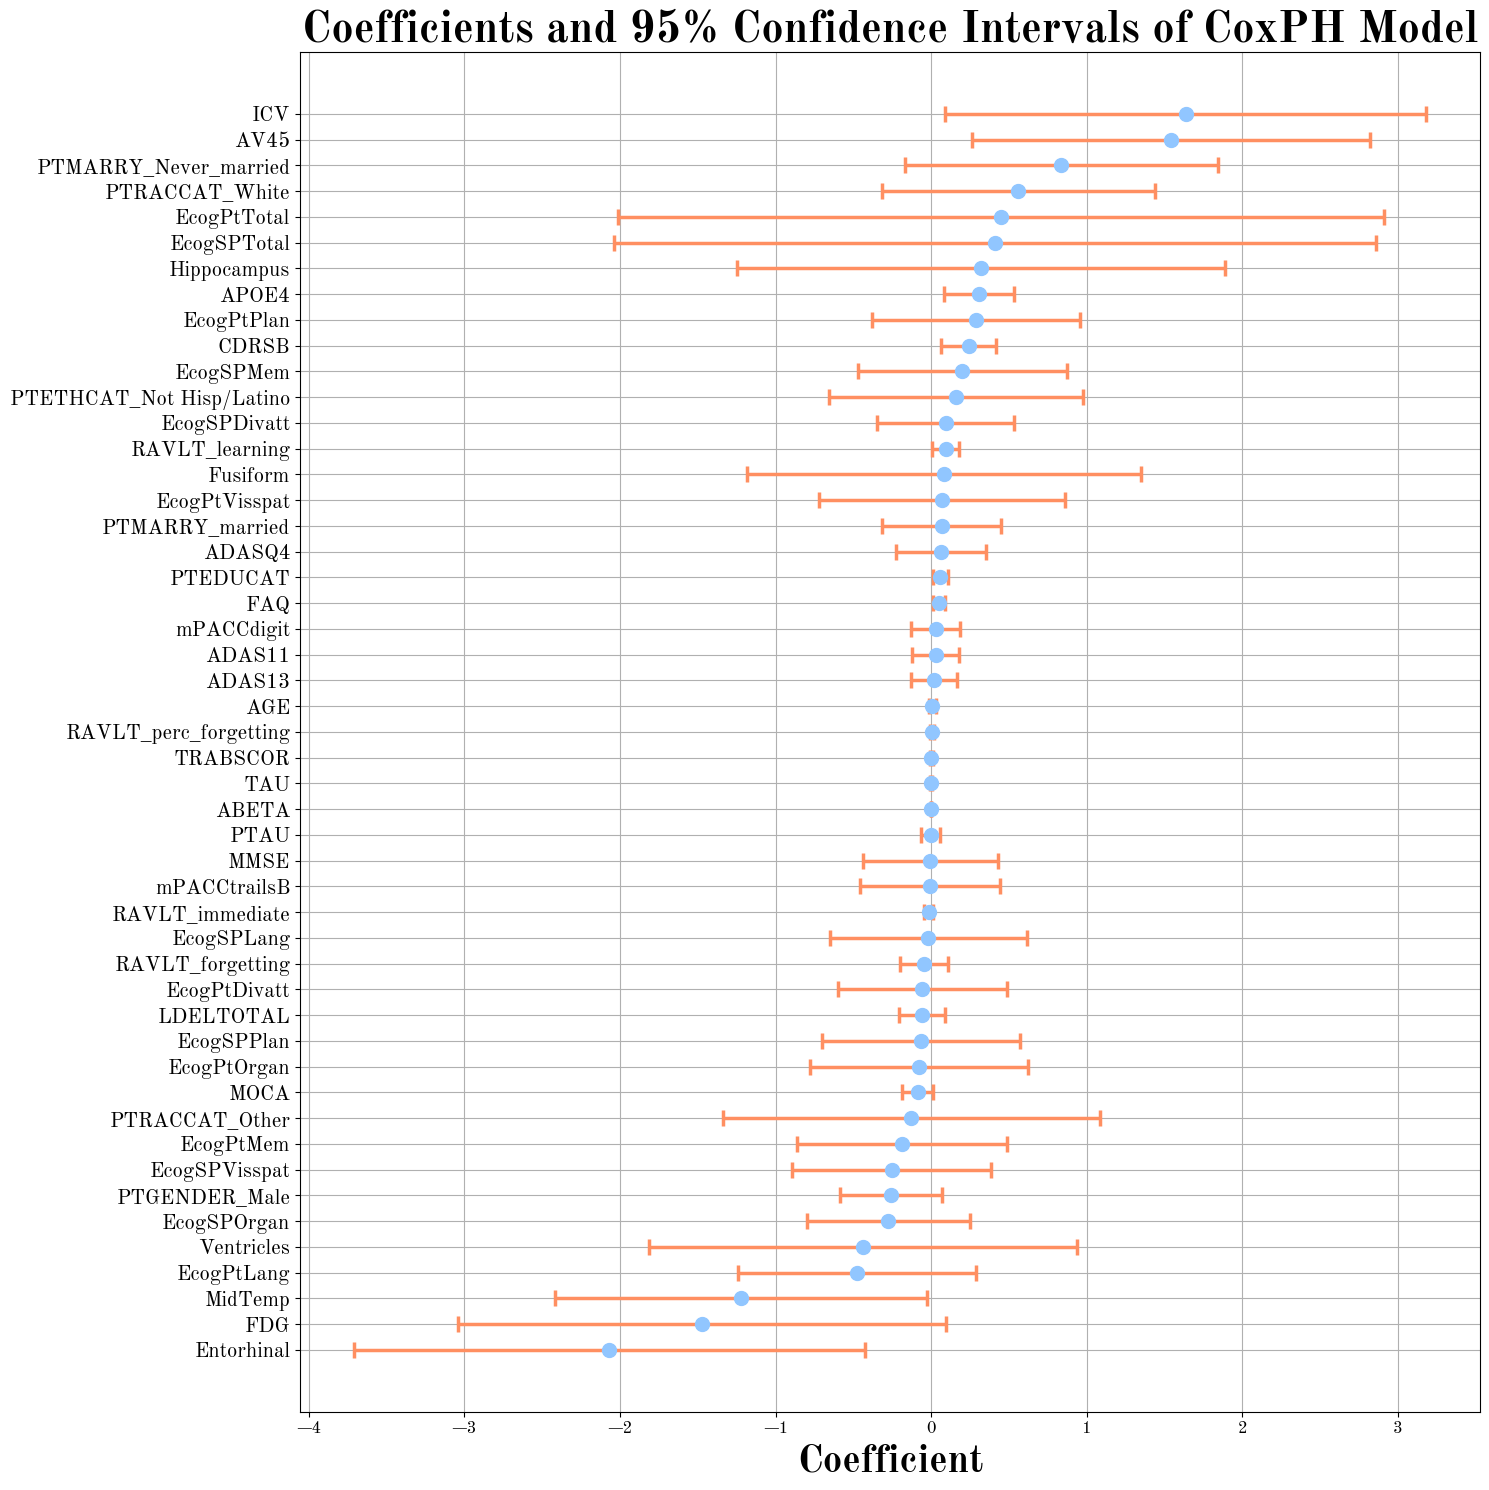

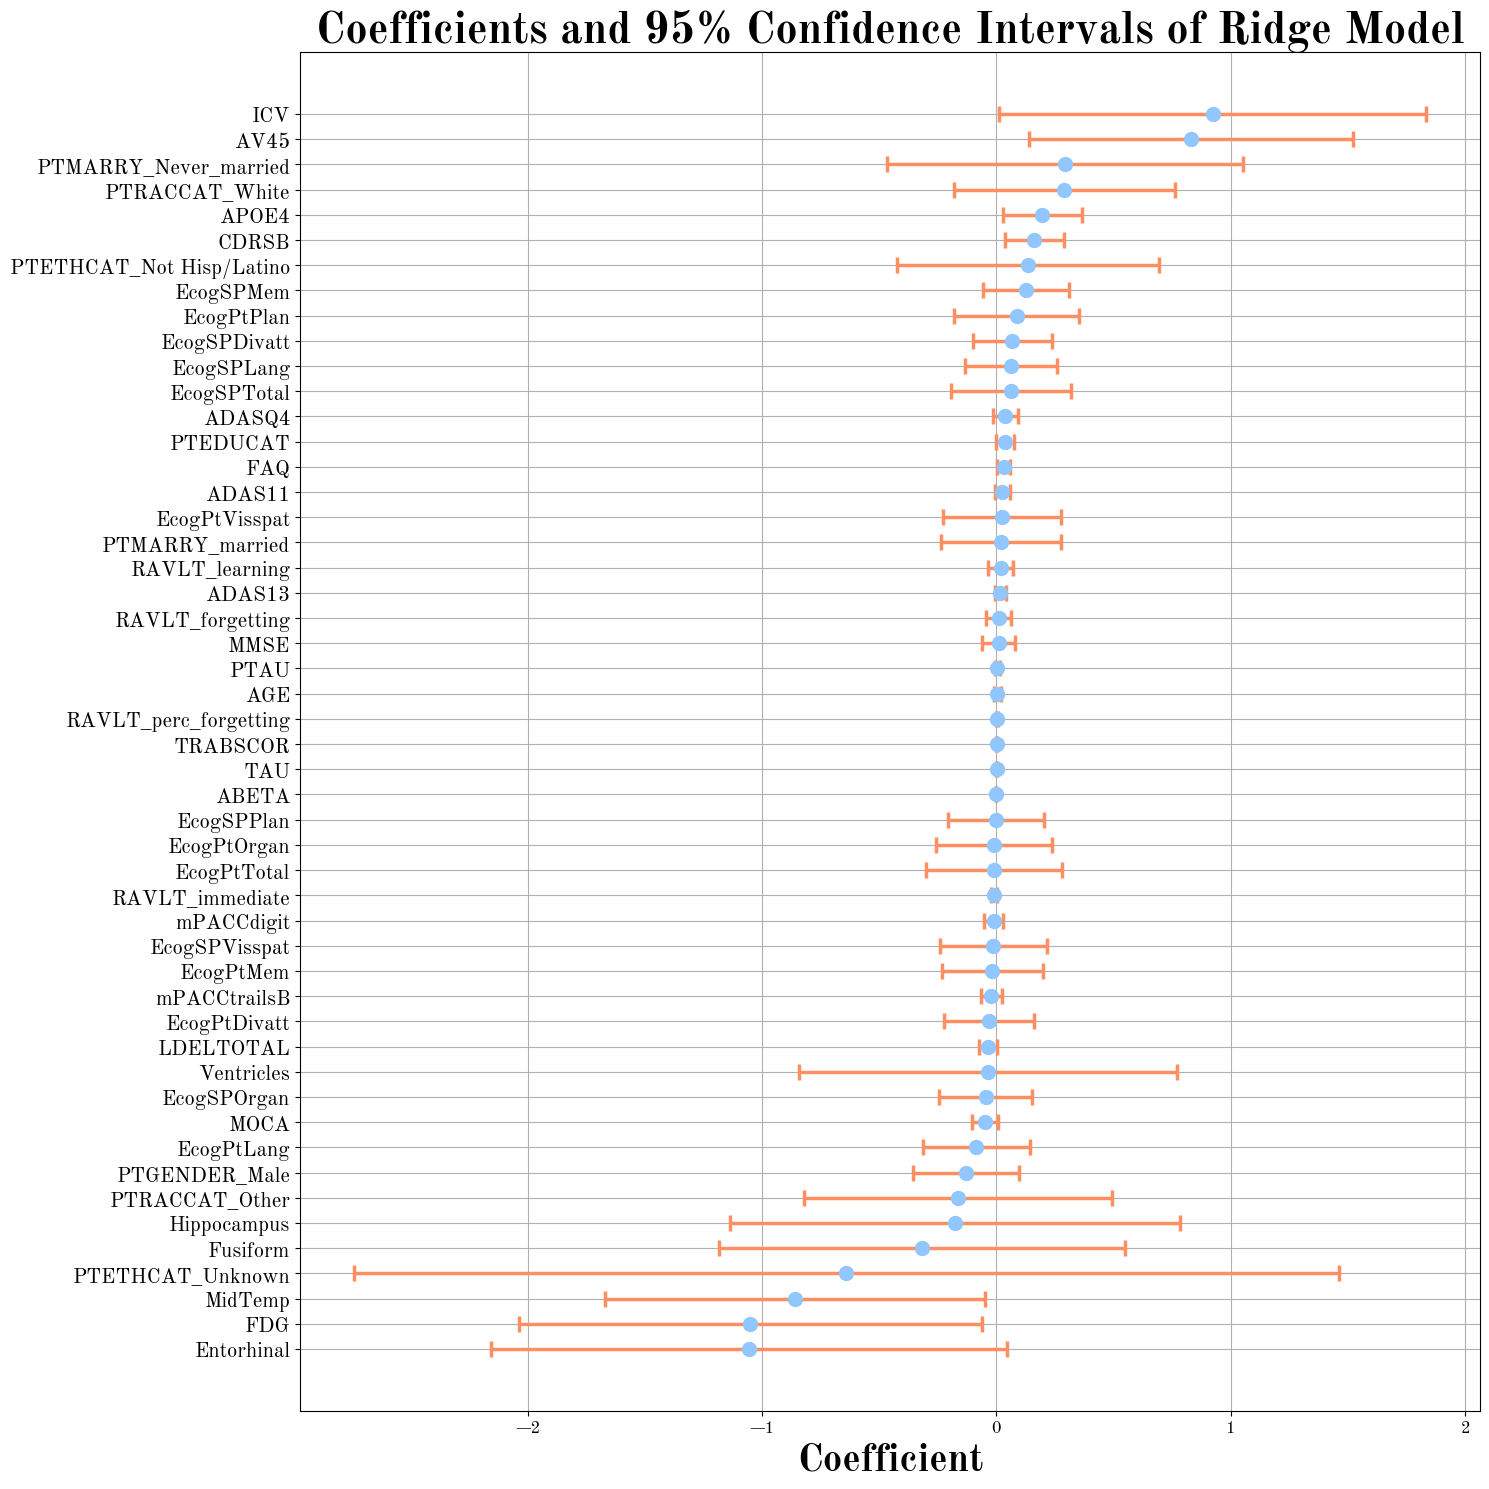

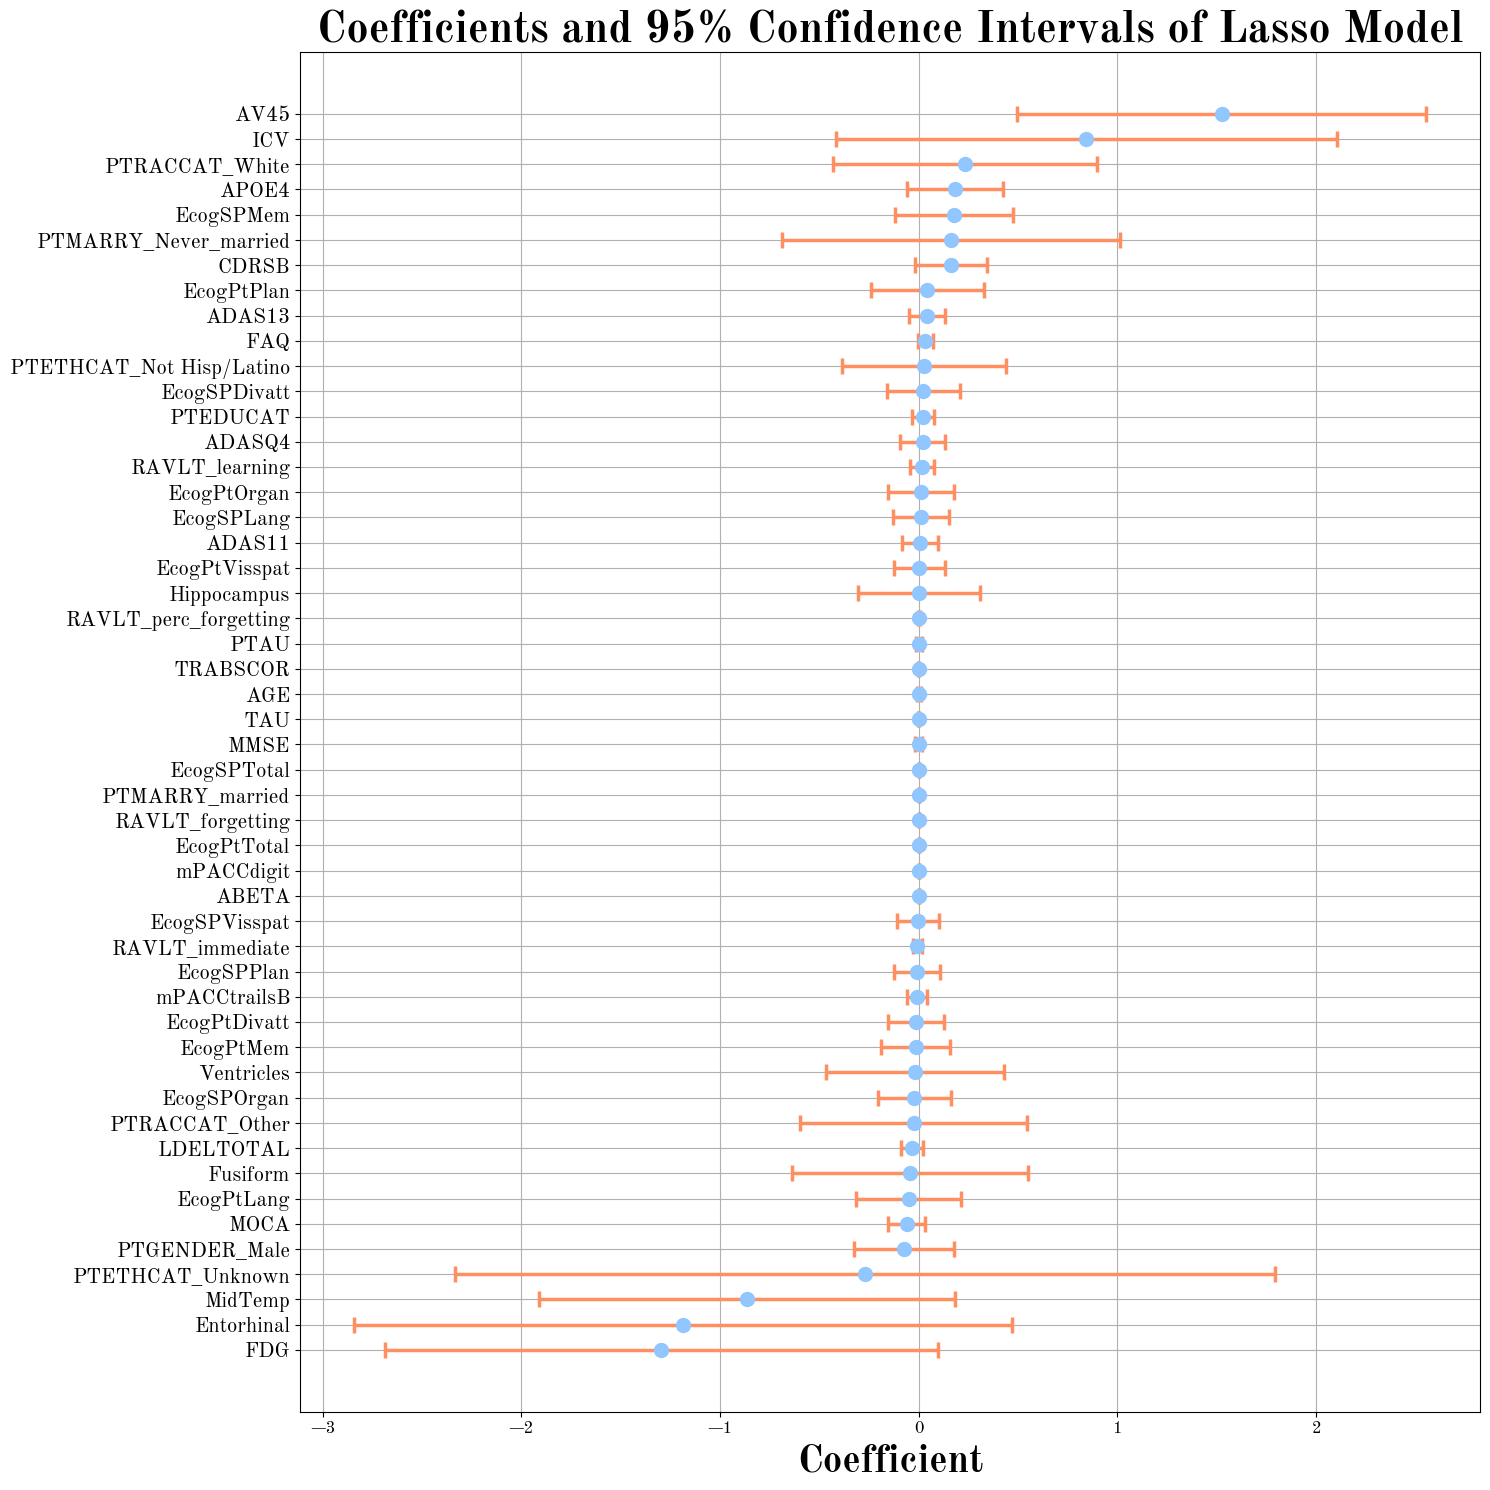

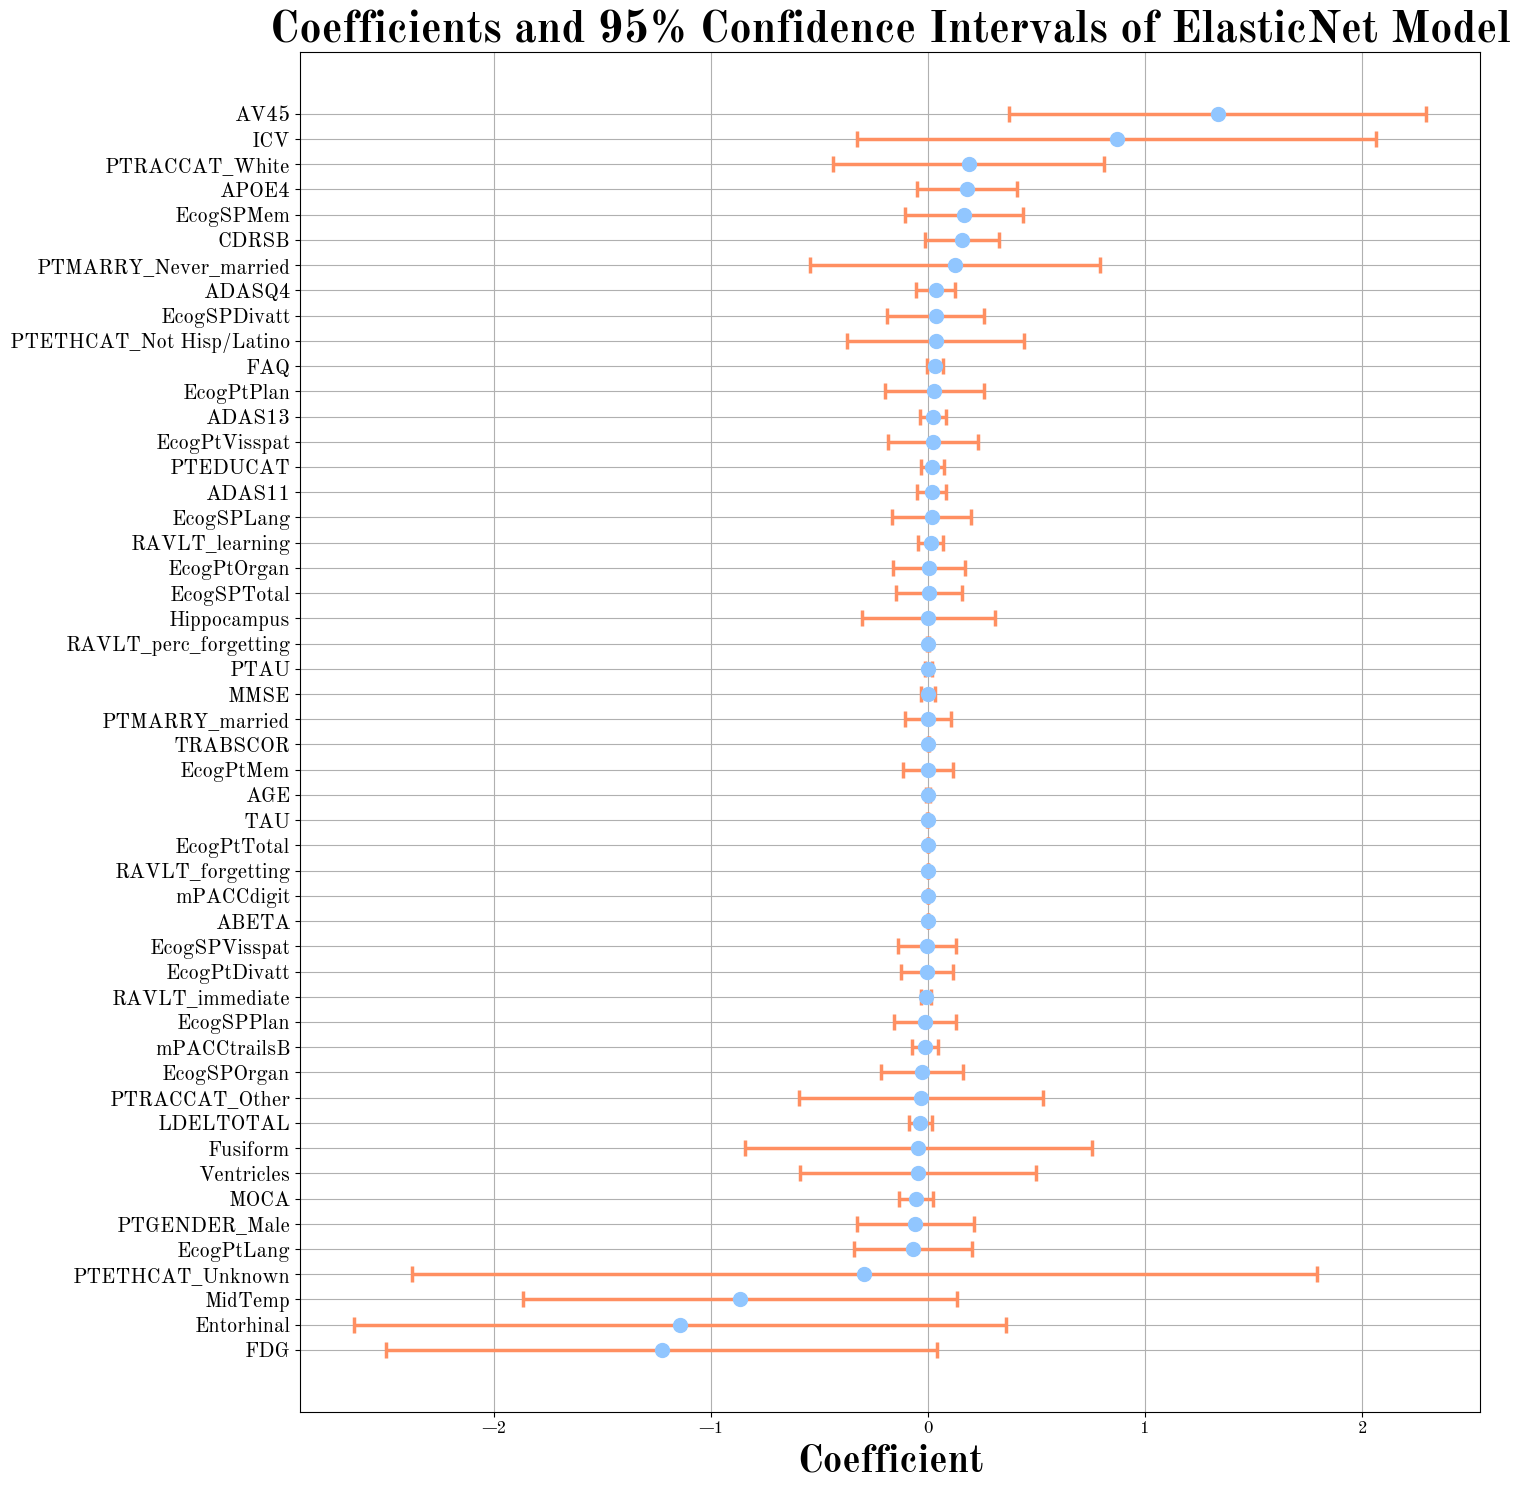

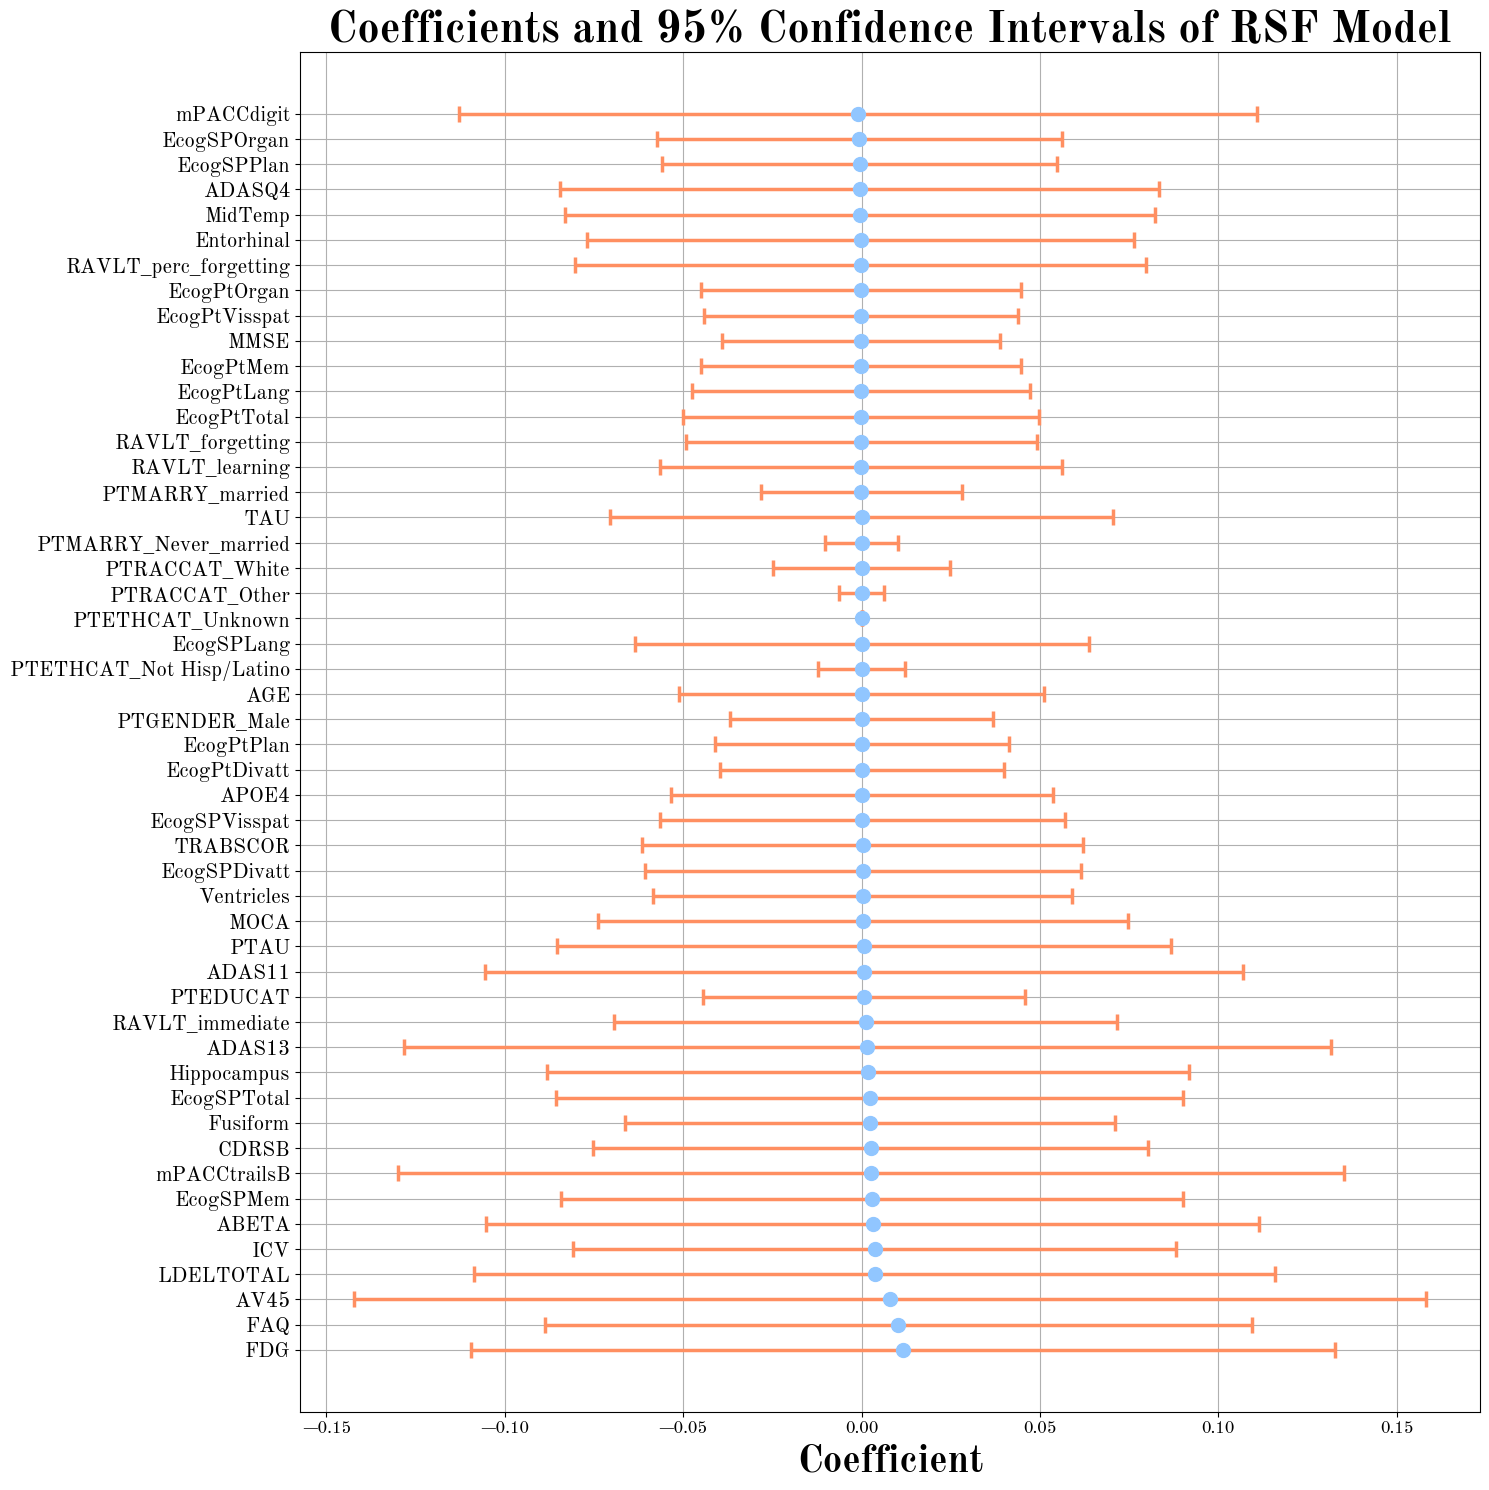

In [26]:
from Utils.plot_functions import plot_errorbar, plot_bar_difference
from sksurv.linear_model import CoxPHSurvivalAnalysis

cph_models_coef = [results, results_ridge, results_lasso, results_elastic]
labels = ['CoxPH', 'Ridge', 'Lasso', 'ElasticNet']
path = ['coxph','ridge', 'lasso', 'elastic']

model = CoxPHSurvivalAnalysis(alpha=0.1)
x_train, y_train = get_x_y(dfs_train[0], attr_labels=["Event", "M"], pos_label=1)
model.fit(x_train, y_train)


for i, params in enumerate(cph_models_coef):
    
    model.coef_ = params['coef']
    params_sorted = params.sort_values(by='coef')   
    if(i == 0):
        params_sorted = params_sorted[params_sorted.index != 'PTETHCAT_Unknown']
    plot_errorbarr(params_sorted['coef'], params_sorted['coef lower 95%'], params_sorted['coef upper 95%'], folder_path + '/' + path[i], labels[i], params_sorted, (15, 15))

coef = results_rsf['importance_mean']
ci_lower = results_rsf['importance_ci_lower']
ci_upper = results_rsf['importance_ci_upper']
plot_errorbarr(coef, ci_lower, ci_upper, folder_path + '/rsf', 'RSF', results_rsf, (15, 15))

In [27]:
from Utils.plot_functions import get_color_gradient

def plot_bar_differencee(model, df_test_inp, label, path):
    df_test = df_test_inp.copy()
    df_test = df_test[df_test['Event'] ==1]
  
    x_test, y_test = get_x_y(df_test, attr_labels=["Event", "M"], pos_label=1)
    pred_surv_funcs = model.predict_survival_function(x_test)
    # print(model.predict(x_test))
    # print(model.baseline_hazard_)
    pred_times = []
    for fn in pred_surv_funcs:
    # Check if there are any points where fn.y <= 0.5
        # print(fn.x[fn.y <= 0.5])
        below_0_5 = fn.x[fn.y <= 0.5]
        if below_0_5.size > 0:
            pred_times.append(below_0_5[0])
        else:
            # Use the maximum time if no probability drops below 0.5
            pred_times.append(fn.x[-1])

    time_diff = pred_times - y_test['M']
    bins = np.arange(time_diff.min()-6, time_diff.max()+6, 6)
    counts, _ = np.histogram(time_diff, bins=bins)

    plt.figure(figsize=(20, 10))

    plt.bar(bins[:-1], counts, color=get_color_gradient(my_colors[0], my_colors[1], len(bins)), zorder=3, width=3)
    plt.title(f'Difference Between {label} Model Prediction and Actual Survival Function', fontproperties=prop_bold, fontsize=40)
    plt.xlabel('Difference (months)', fontproperties=prop_bold, fontsize=36)
    plt.ylabel('Count', fontproperties=prop_bold, labelpad=25, fontsize=36,)
    
    plt.xticks(bins, fontproperties=prop_regular, rotation=90, fontsize=24)
    plt.yticks(np.arange(0,counts.max()+1), fontproperties=prop_regular, fontsize=24)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.savefig(f"./results/{path}_bar.pdf")
    plt.show()

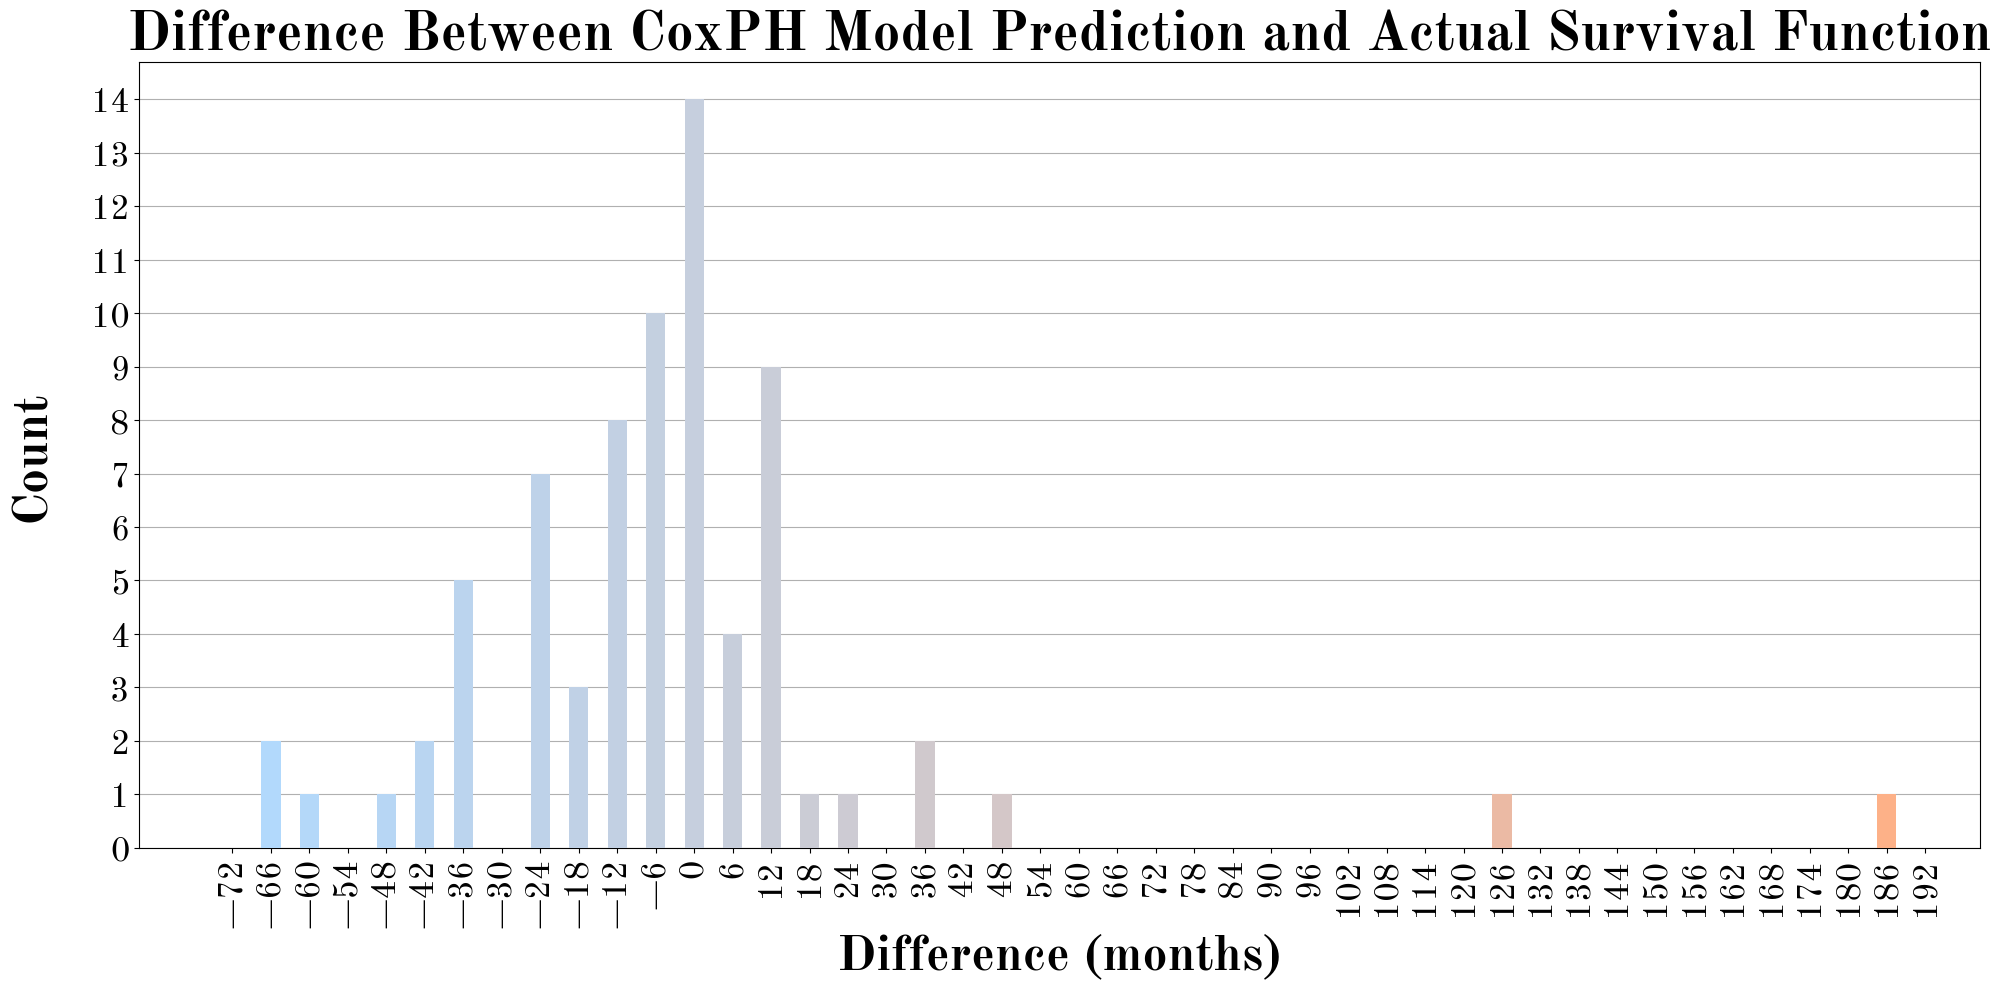

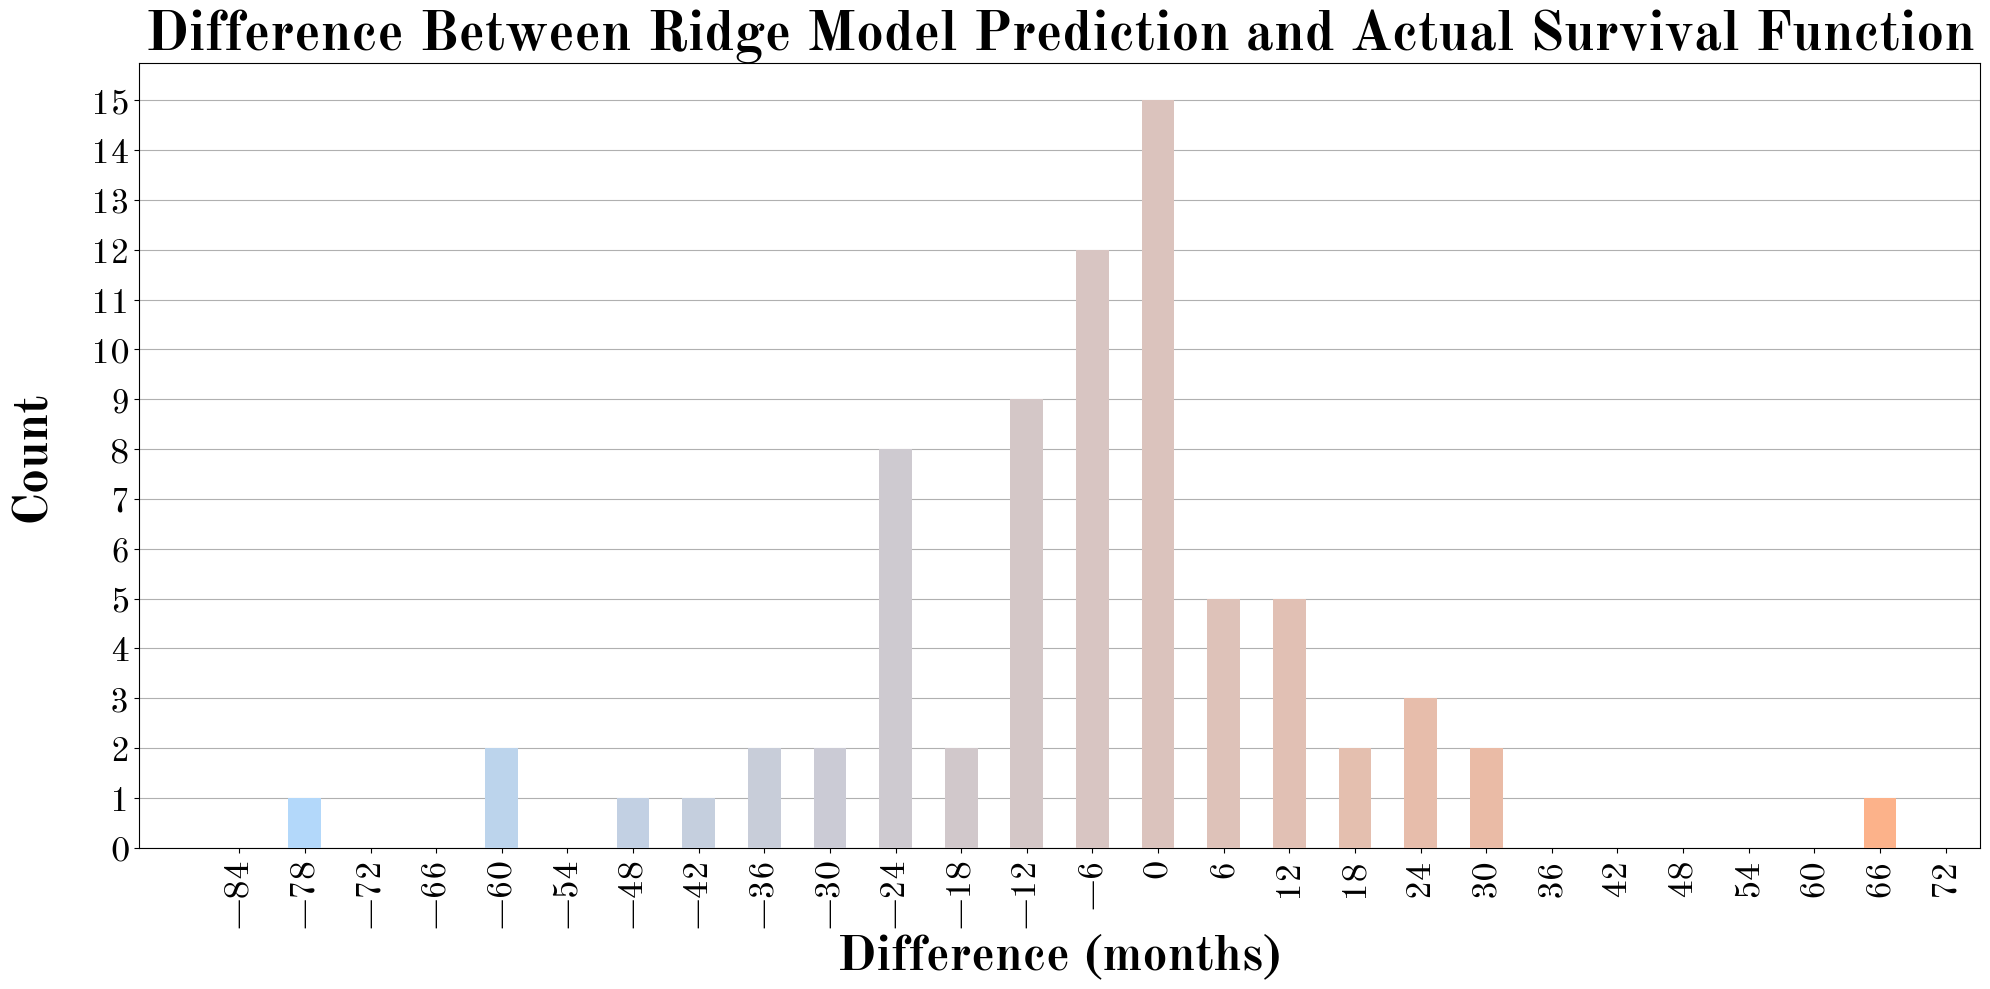

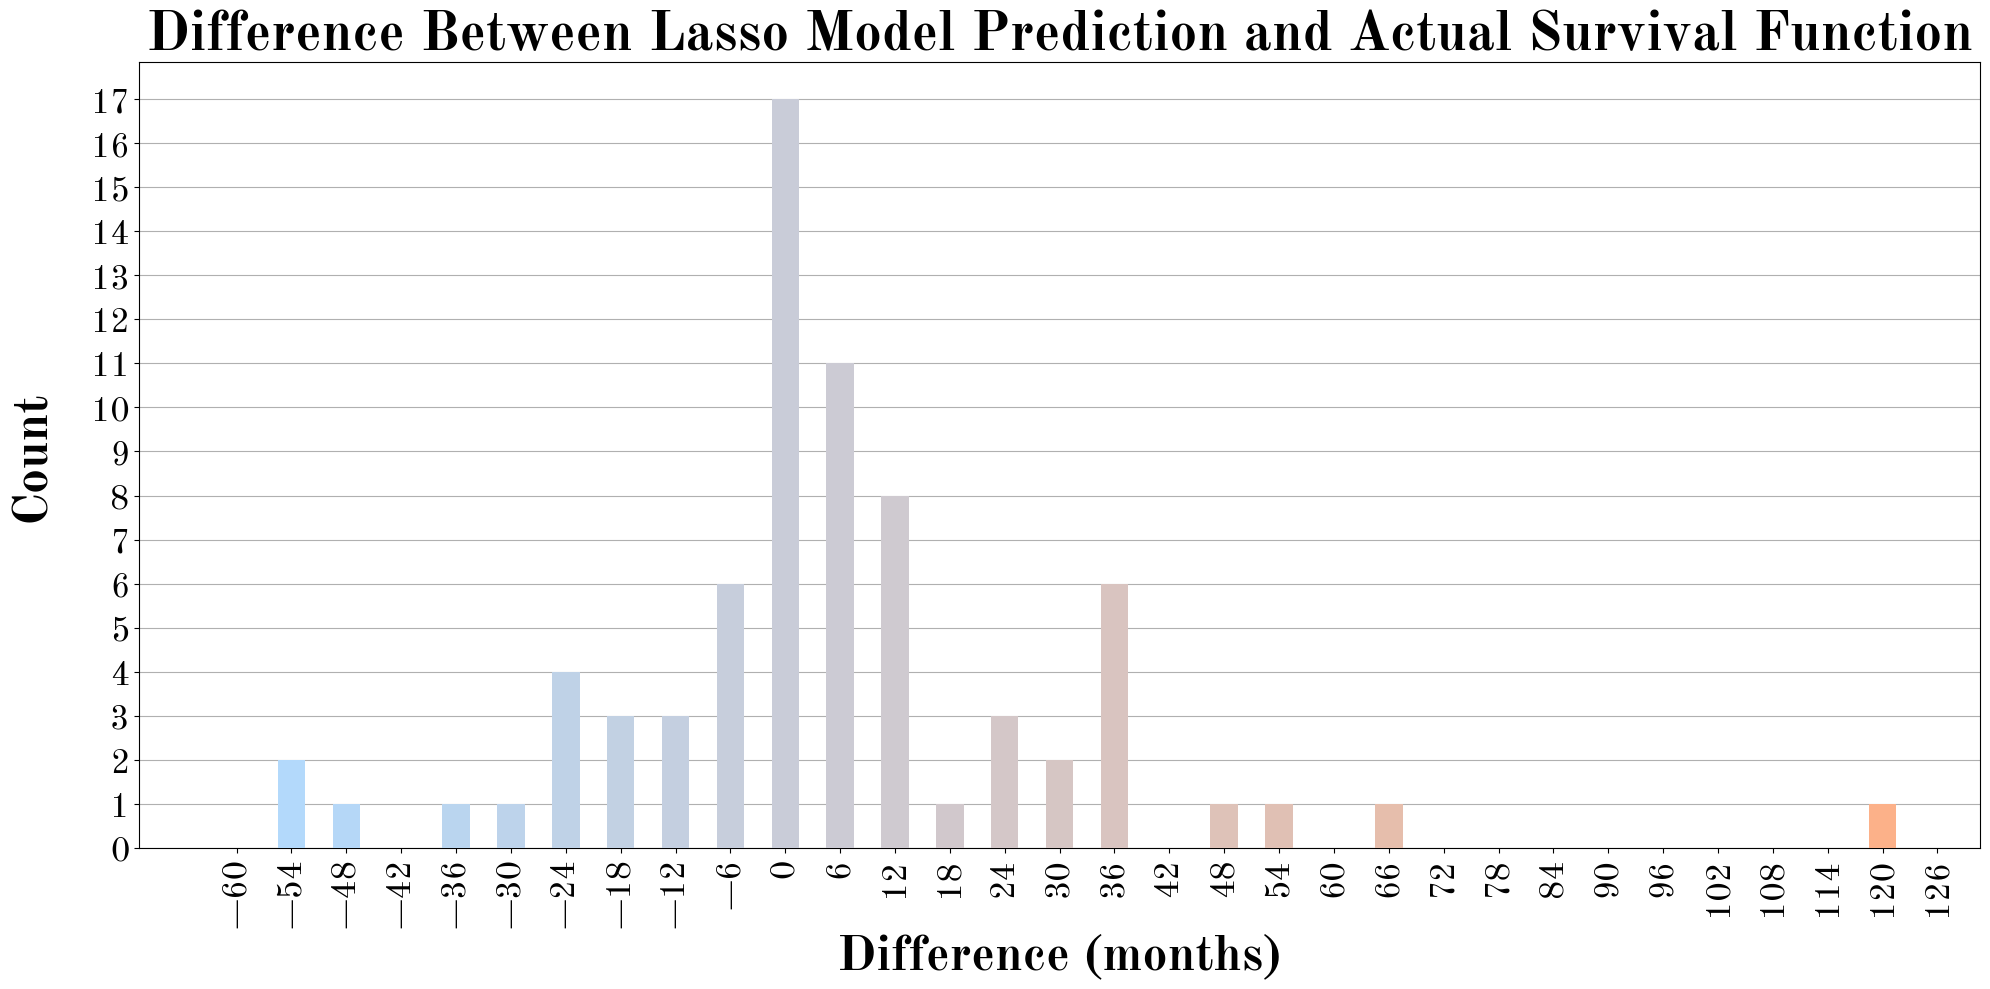

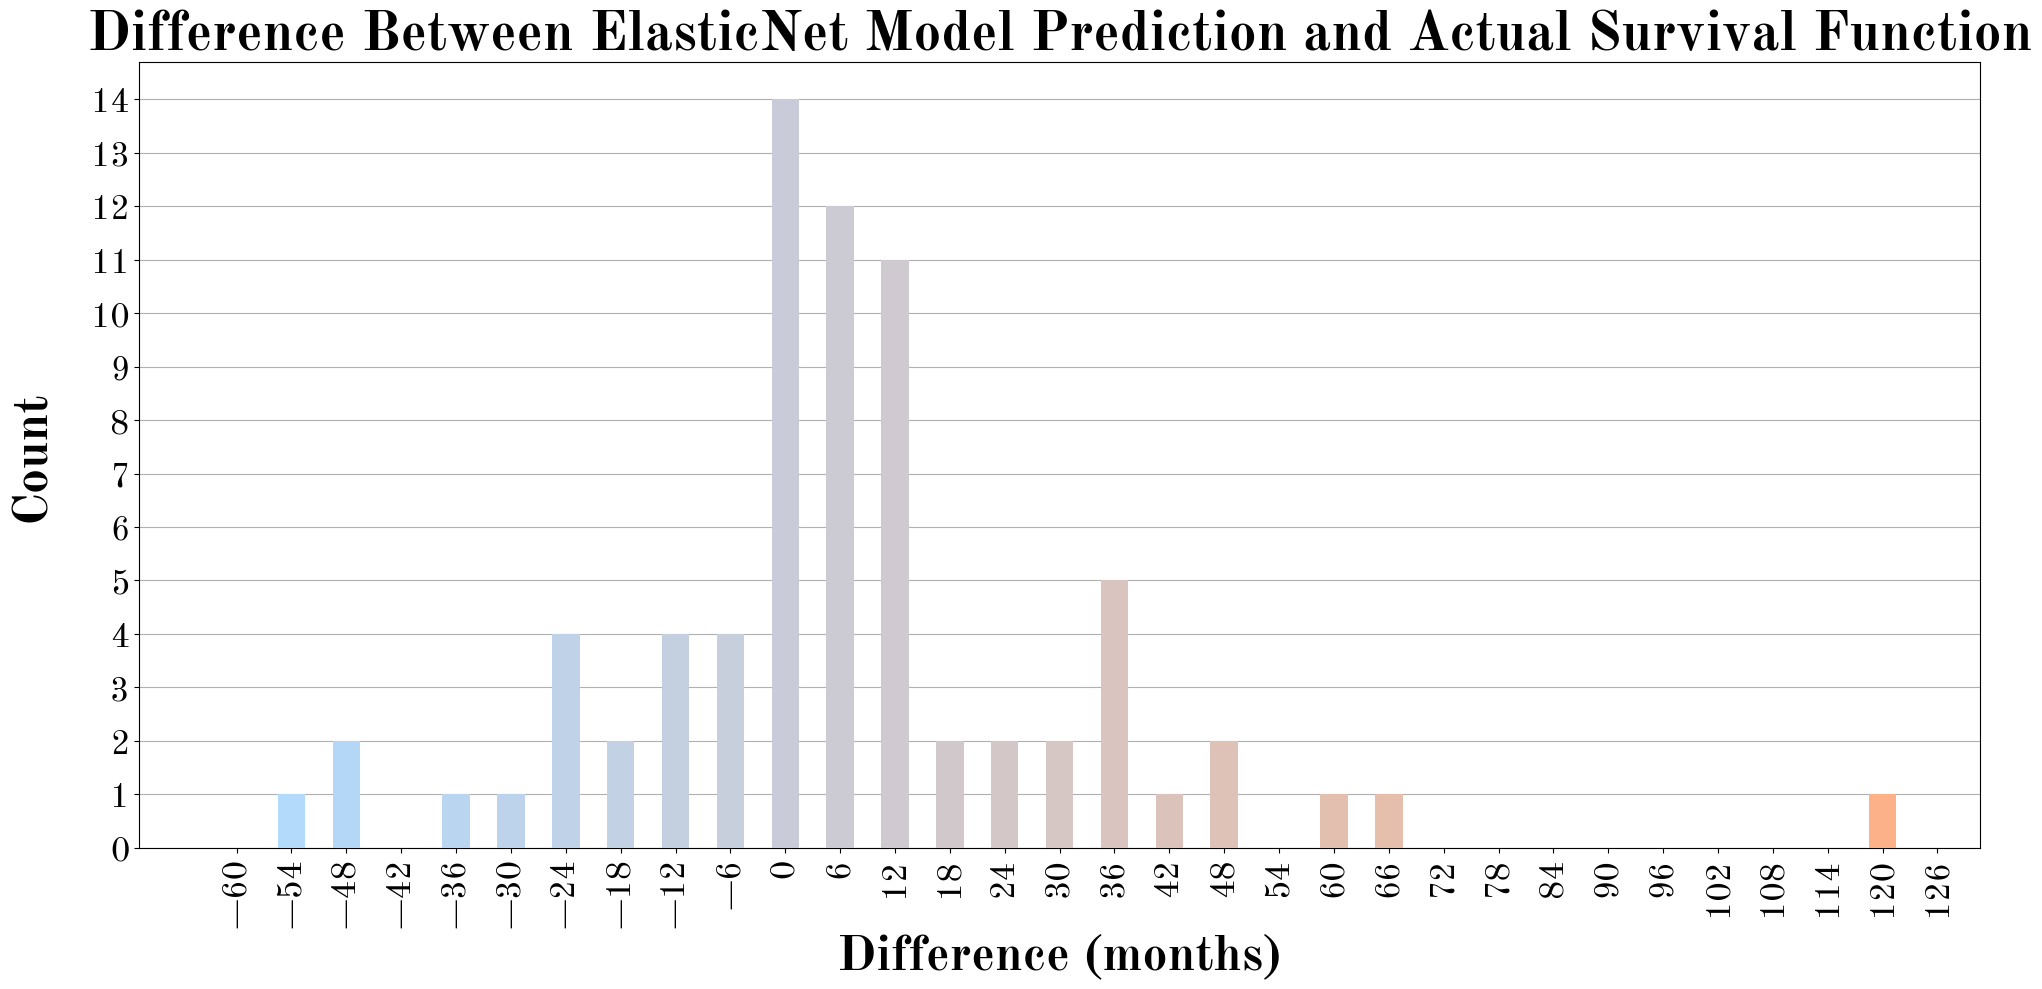

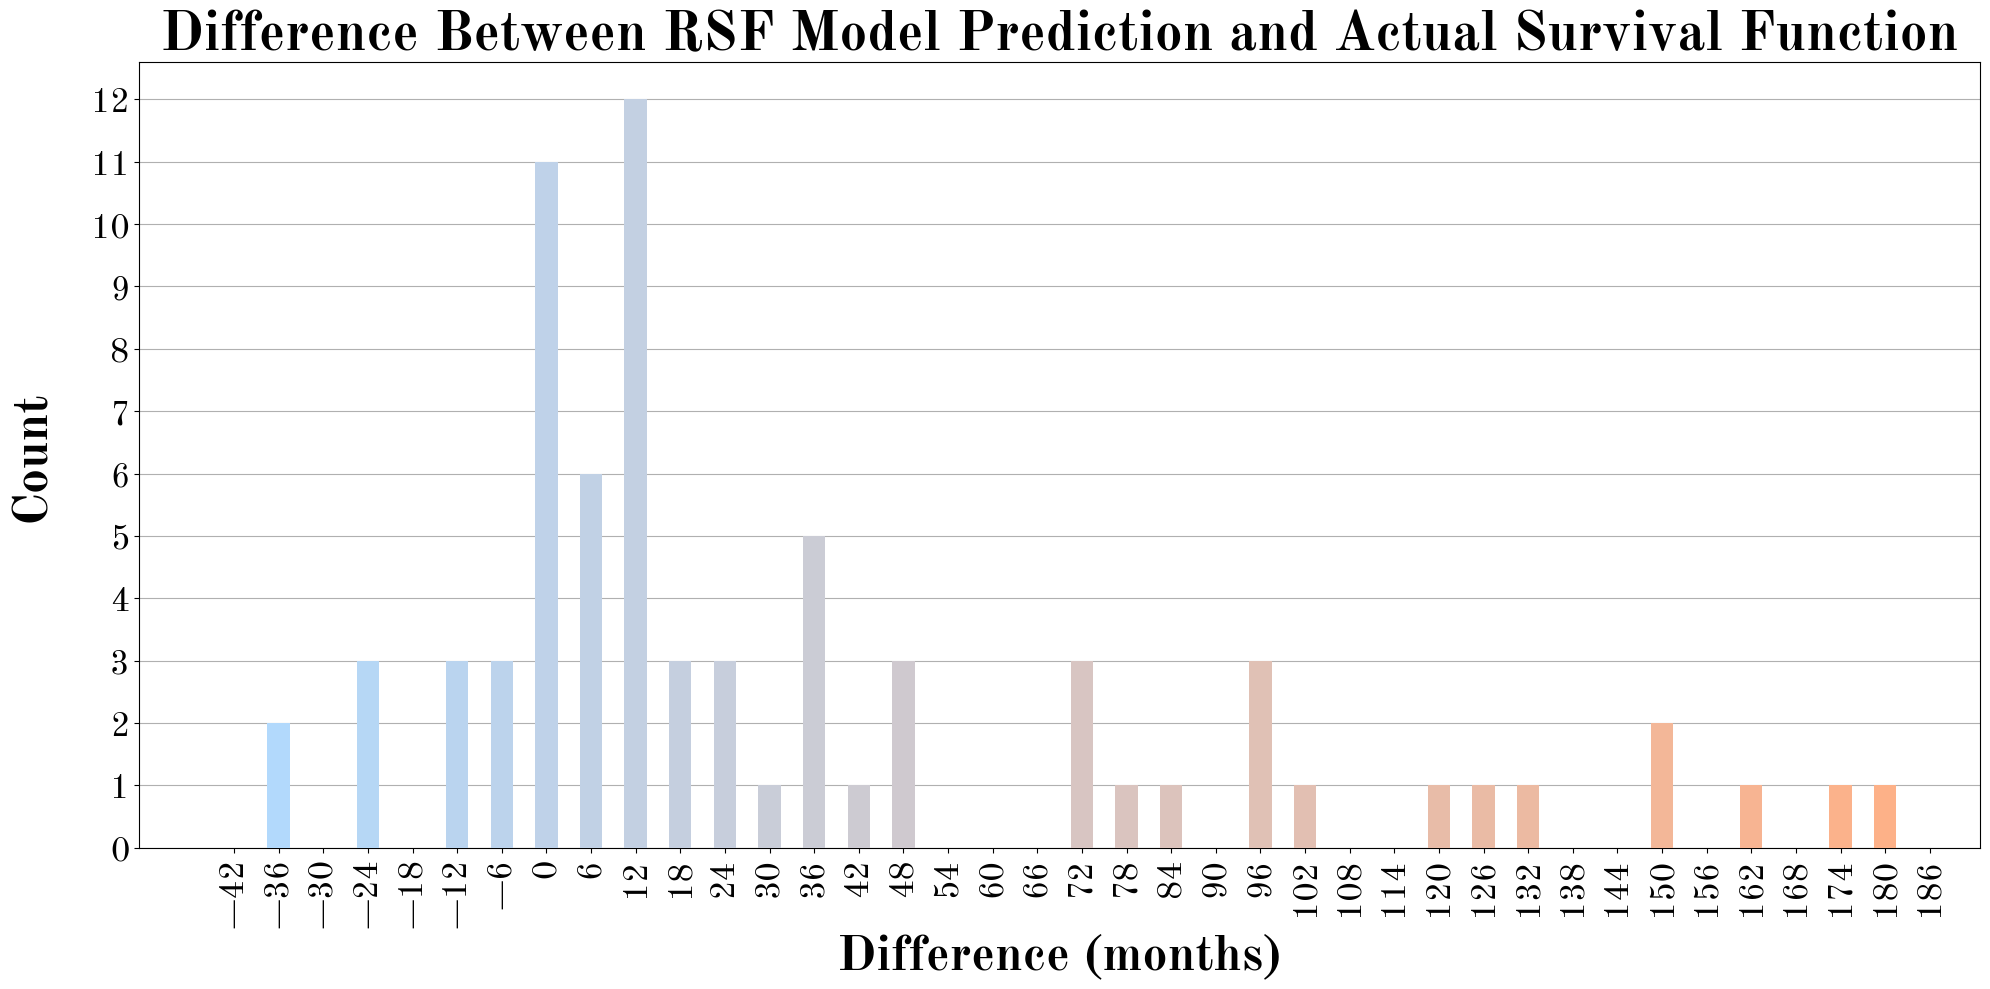

In [28]:
for i, (params, baseline) in enumerate(zip(cph_models_coef, baseline_hazards)):
    model.coef_ = params['coef']
    model.baseline_hazard_ = baseline
    plot_bar_differencee(model, dfs_test[0], labels[i], folder_path + '/'+path[i])
plot_bar_differencee(rsfs[0][0], dfs_test[0], 'RSF', folder_path + '/rsf')